In [1]:
import ROOT
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from common import common

output_basedir = '../output'

def create_dir_if_not_exits(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

create_dir_if_not_exits(output_basedir)

Welcome to JupyROOT 6.18/04


In [2]:
def TH1F2np(histo, overflow=True, underflow=True):
    content = histo.GetArray()
    content.SetSize(histo.GetNbinsX() + 2)
    content = np.array(list(content))

    if not overflow:
        content = content[:-1]
    if not underflow:
        content = content[1:]
    
    binning = np.array(histo.GetXaxis().GetXbins())
    if overflow:
        binning = np.append(binning, [np.inf])
    if underflow:
        binning = np.insert(binning, 0, [-np.inf])
    return content, binning

def get_binning_for_plot(binning):
    binning = np.copy(binning)
    if binning[-1] == np.inf:
        binning[-1] = (binning[-2] - binning[-3]) + binning[-2]
    if binning[0] == -np.inf:
        binning[0] = binning[1] - (binning[2] - binning[1])
    return binning

def TH2F2np(histo, underflow=True, overflow=True):
    content = np.zeros((histo.GetNbinsX() + 2, histo.GetNbinsY() + 2))
    
    # dump everything (under/over-flow included)
    for xbin in range(0, histo.GetNbinsX() + 2):
        for ybin in range(0, histo.GetNbinsY() + 2):
            content[xbin, ybin] = histo.GetBinContent(xbin, ybin)

    if not overflow:
        content = content[:-1, :-1]
    if not underflow:
        content = content[1:, 1:]
    
    binningx = np.array(histo.GetXaxis().GetXbins())
    binningy = np.array(histo.GetYaxis().GetXbins())
    
    if overflow:
        binningx = np.append(binningx, [np.inf])
        binningy = np.append(binningy, [np.inf])
    if underflow:
        binningx = np.append([-np.inf], binningx)
        binningy = np.append([-np.inf], binningy)
        
    return content, binningx, binningy

### Defining quantities

In [3]:
file_name = '../merged_normalized_final/mcAll_prodAll_MxAODJetSys._sysNominal.merged.norm.root'
quantity = 'pT_yy'
do_plots = True

In [4]:
if not os.path.exists(file_name):
    raise IOError('Cannot find file %s' % file_name)
print(file_name)
f = ROOT.TFile(file_name)

../merged_normalized_final/mcAll_prodAll_MxAODJetSys._sysNominal.merged.norm.root


In [5]:
base_name = os.path.basename(file_name)
mc = base_name.split('_')[0]
production = base_name.split('_')[1]
sys = base_name.split('_sys')[1].split('.merged.norm.root')[0].replace('HGamEventInfo_', '').replace('AuxDyn', '')
print("mc_name: %s" % mc)
print("production_mode: %s" % production)
print("sys: %s" % sys)

mc_name: mcAll
production_mode: prodAll
sys: Nominal


In [8]:
luminosity_pb = common.luminosity_pb[mc]
print("luminosity: %f /pb" % luminosity_pb)

luminosity: 138972.000000 /pb


In [10]:
def remove_under_overflow(data, do_underflow, do_overflow):
    """
    given an array return a copy removing the first and/or the last element,
    depending on the flags
    """
    data = np.copy(data)
    if not do_overflow:
        data = data[:-1]
    if not do_underflow:
        data = data[1:]
    return data

In [11]:
def extend_bin_labels(bin_labels, binning, add_underflow, add_overflow):
    """
    bin_labels: bin labels without under/overflow
    binning: binning without under/overflow
    """
    result = bin_labels[:]
    if add_overflow:
        result.append(r"$\geq %.1f$" % binning[-1])
    if add_underflow:
        result = [r"$< %.1f$" % binning[0]] + result
    return result

In [12]:
latex_label = common.latex_labels[quantity]
binning = np.array(common.binnings[quantity])       # without under/over-flow
bin_labels = common.bin_labels[quantity]            # without under/over-flow
show_overflow = common.show_overflows[quantity]
show_underflow = common.show_underflows[quantity]

do_normalization = common.do_normalizations[quantity]
do_log_x = common.do_logs_x[quantity]
unit = common.unities_root_file[quantity]

if unit == 'MeV':
    binning /= 1000.

binning_with_extraflow = np.concatenate([[-np.inf], np.array(binning), [np.inf]])
bin_labels_extraflow = extend_bin_labels(bin_labels, binning, add_overflow=True, add_underflow=True)

print("quantity: %s" % quantity)
print("label: %s" % latex_label)
print("binning: %s" % binning)
print('bin-labels (no under/over-flow): %s' % ', '.join(bin_labels))
print('show overflow: %s' % show_overflow)
print('show under: %s' % show_underflow)
print('do normalization: %s' % do_normalization)
print('do log-x: %s' % do_log_x)
print('unit: %s' % unit)
print("binning with extraflow %s" % binning_with_extraflow)
print("bin labes with extraflow %s" % bin_labels_extraflow)

quantity: pT_yy
label: $p_{T}^{\gamma\gamma}$ [GeV]
binning: [  0.   5.  10.  15.  20.  25.  30.  35.  45.  60.  80. 100. 120. 140.
 170. 200. 250. 350.]
bin-labels (no under/over-flow): [0 - 5), [5 - 10), [10 - 15), [15 - 20), [20 - 25), [25 - 30), [30 - 35), [35 - 45), [45 - 60), [60 - 80), [80 - 100), [100 - 120), [120 - 140), [140 - 170), [170 - 200), [200 - 250), [250 - 350)
show overflow: True
show under: False
do normalization: True
do log-x: True
unit: MeV
binning with extraflow [-inf   0.   5.  10.  15.  20.  25.  30.  35.  45.  60.  80. 100. 120.
 140. 170. 200. 250. 350.  inf]
bin labes with extraflow ['$< 0.0$', '[0 - 5)', '[5 - 10)', '[10 - 15)', '[15 - 20)', '[20 - 25)', '[25 - 30)', '[30 - 35)', '[35 - 45)', '[45 - 60)', '[60 - 80)', '[80 - 100)', '[100 - 120)', '[120 - 140)', '[140 - 170)', '[170 - 200)', '[200 - 250)', '[250 - 350)', '$\\geq 350.0$']


## Create output directories

In [34]:
output_dir_plot1D = '{output_basedir}/plot1D/{quantity}/'.format(output_basedir=output_basedir, quantity=quantity)
output_dir_folding_matrices = '{output_basedir}/folding_matrices/{quantity}/np_array/'.format(output_basedir=output_basedir, quantity=quantity)
output_dir_folding_matrices_plot = '{output_basedir}/folding_matrices/{quantity}/plot/'.format(output_basedir=output_basedir, quantity=quantity)
output_dir_xsections = '{output_basedir}/xsections/{quantity}'.format(output_basedir=output_basedir, quantity=quantity)
output_dir_acceptances = '{output_basedir}/acceptances/{quantity}'.format(output_basedir=output_basedir, quantity=quantity)
output_dir_cfactors = '{output_basedir}/cfactors/{quantity}'.format(output_basedir=output_basedir, quantity=quantity)
output_dir_dalitz = '{output_basedir}/dalitz/{quantity}'.format(output_basedir=output_basedir, quantity=quantity)


for output_dir in (output_dir_plot1D, output_dir_folding_matrices,
                   output_dir_folding_matrices_plot, output_dir_xsections,
                   output_dir_acceptances, output_dir_cfactors, output_dir_dalitz):
    create_dir_if_not_exits(output_dir)

In [14]:
def get_content_binning_from_file(f, name):
    """
    return the content and the binning of an histogram with name name from ROOT file f
    """
    h = f.Get(name)
    if not h:
        raise ValueError("cannot find histogram %s in file %s" % (name, f))
    content, binning = TH1F2np(h)
    return content, binning

In [15]:
def plot1D(binning, content, bin_labels, title, latex_label,
           show_underflow, show_overflow,
           do_normalization, do_log_x, ax=None, color="red"):
    """
    binning: edges without under/over-flow
    content: full content, including under/over-flow
    """
    
    # remove under/overflow if needed
    content_plot = remove_under_overflow(content, do_underflow=show_underflow, do_overflow=show_overflow)
    
    # add -inf, +inf to the binning if needed
    binning_with_extraflow = np.copy(np.array(binning))
    if show_underflow:
        binning_with_extraflow = np.append(-np.inf, binning_with_extraflow)
    if show_overflow:
        binning_with_extraflow = np.append(binning_with_extraflow, np.inf)
    
    # create special bins for under/over-flow
    binning_plot = get_binning_for_plot(binning_with_extraflow)
    
    bincenters = 0.5 * (binning_plot[1:] + binning_plot[:-1])
    binwidths = (binning_plot[1:] - binning_plot[:-1])
    
    bin_labels_plot = bin_labels[:]
    
    # add labels for under/over-flow
    bin_labels_plot = extend_bin_labels(bin_labels, binning, add_overflow=show_overflow, add_underflow=show_underflow)
        
    if ax is None:
        fig, ax = plt.subplots()
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)

    ax.bar(bincenters, content_plot / binwidths if do_normalization else content_plot, binwidths, color=color)
    ax.set_xlabel(latex_label)
    #ax.text(binning[-7], 0.150, r'$H\rightarrow\gamma\gamma$', fontsize=13)
    #ax.text(binning[-7], 0.140, r'$\sqrt{s} = 13$ TeV', fontsize=13)
    #ax.text(binning[-7], 0.130, r'$140$ fb$^{-1}$', fontsize=13)
    if do_normalization:
        ax.set_ylabel('dN / d%s' % str(latex_label.split('[')[0]))
    else:
        ax.set_ylabel('Entries')

    ax.set_title(title)
    if do_log_x:
        if binning_plot[0] == 0:
            ax.set_xlim(binning_plot[0] + binwidths[0] * 0.25)
        ax.set_xscale('log')

    if bin_labels_plot is not None:
        ax.set_xticks(bincenters)
        ax.set_xticklabels(bin_labels_plot, rotation=90)
        
    return fig

In [16]:
# in python3 use dataclasses

class Component:
    def __init__(self, recotrue, fiducial, dalitz):
        if recotrue not in ('reco', 'true'):
            raise ValueError('recotrue value %s not valid' % recotrue)
        if fiducial not in ('All', 'notFiducial', 'isFiducial'):
            raise ValueError('fiducial value %s not valid' % fiducial)
        if dalitz not in ('All', 'notDalitz', 'isDalitz'):
            raise ValueError('dalitz value %s not valid' % dalitz)
            
        self.recotrue = recotrue    
        self.fiducial = fiducial
        self.dalitz = dalitz
        
    def __repr__(self):
        return "<Component recotrue={recotrue} fiducial={fiducial} dalitz={dalitz}>".format(
            recotrue=self.recotrue, fiducial=self.fiducial, dalitz=self.dalitz)
    
    def __hash__(self):
        return hash((self.recotrue, self.fiducial, self.dalitz))
    
    def __eq__(self, other):
        return self.recotrue == other.recotrue and self.fiducial == other.fiducial and self.dalitz == other.dalitz
        
    def get_name(self):
        if self.recotrue == 'true':
            return 'true__{fiducial}_{dalitz}'.format(fiducial=self.fiducial, dalitz=self.dalitz)
        if self.recotrue == 'reco':
            # perché non sono consistenti ??!!!!!!!
            return {('All', 'All'): 'reco__All_isPassed',
                    ('notFiducial', 'notDalitz'): 'reco__notFiducial_isPassed_notDalitz',
                    ('isFiducial', 'All'): 'reco__isFiducial_isPassed',
                    ('notFiducial', 'All'): 'reco__notFiducial_isPassed',
                    ('All', 'isDalitz'): 'reco__isDalitz_isPassed',
                    ('isFiducial', 'notDalitz'): 'reco__isFiducial_notDalitz_isPassed'}[(self.fiducial, self.dalitz)]
                        
    
    def get_color(self):
        # https://matplotlib.org/examples/color/named_colors.html
        color_dict = {('true', 'isFiducial', 'notDalitz'): 'springgreen',
                      ('true', 'All', 'isDalitz'): 'lightseagreen',
                      ('true', 'notFiducial', 'notDalitz'): 'seagreen',
                      ('true', 'All', 'notDalitz'): 'lightsteelblue',
                      ('reco', 'All', 'All'): 'C1',
                      ('reco', 'notFiducial', 'notDalitz'): 'C2',
                      ('reco', 'isFiducial', 'All'): 'C3',
                      ('reco', 'notFiducial', 'All'): 'C4',
                      ('reco', 'All', 'isDalitz'): 'C5',
                      ('reco', 'isFiducial', 'notDalitz'): 'C6'
                     }
        try:
            color = color_dict[(self.recotrue, self.fiducial, self.dalitz)]
            return color
        except KeyError:
            print("color for %s %s %s not encoded, returning red" % (self.recotrue, self.fiducial, self.dalitz))
            return 'red'

yield (including under/over-flow):
  true  fiducial: All             dalitz: notDalitz       events: 17422.95
  true  fiducial: notFiducial     dalitz: notDalitz       events:  8625.28
  true  fiducial: isFiducial      dalitz: notDalitz       events:  8797.67
  true  fiducial: All             dalitz: isDalitz        events:  1133.98
  reco  fiducial: All             dalitz: All             events:  6230.10
  reco  fiducial: notFiducial     dalitz: notDalitz       events:    99.61
  reco  fiducial: isFiducial      dalitz: All             events:  6105.41
  reco  fiducial: notFiducial     dalitz: All             events:   124.69
  reco  fiducial: All             dalitz: isDalitz        events:    25.13


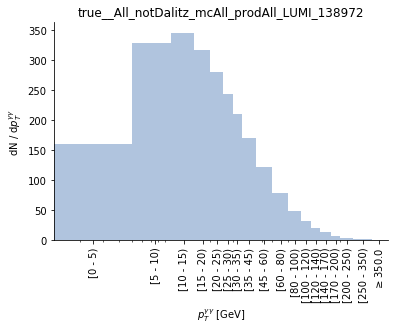

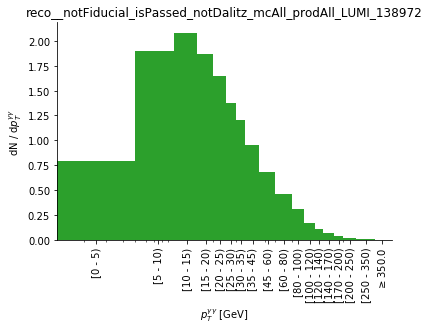

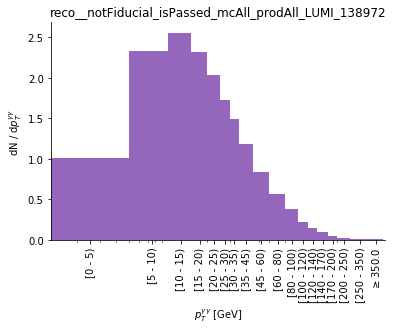

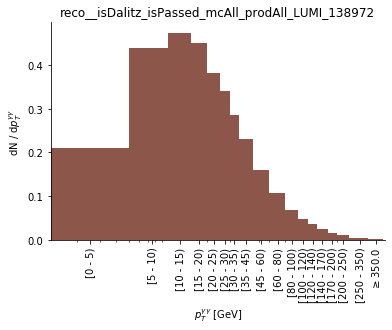

In [17]:
all_content = {}

all_true_combinations = [Component(recotrue='true', fiducial='All', dalitz='notDalitz'),  # histo1d_%s_true__All_notDalitz_norm
                         Component(recotrue='true', fiducial='notFiducial', dalitz='notDalitz'), # "histo1d_%s_true__notFiducial_notDalitz_norm" % quantity)
                         Component(recotrue='true', fiducial='isFiducial', dalitz='notDalitz'),  # histo1d_%s_true__isFiducial_notDalitz_norm" % quantity)
                         Component(recotrue='true', fiducial='All', dalitz='isDalitz'),  # histo1d_%s_true__All_isDalitz_norm
                        ]

all_reco_combinations = [Component(recotrue='reco', fiducial='All', dalitz='All'),                # histo1d_%s_reco__All_isPassed_norm
                         Component(recotrue='reco', fiducial='notFiducial', dalitz='notDalitz'),  # histo1d_%s_reco__notFiducial_isPassed_notDalitz_norm"
                         Component(recotrue='reco', fiducial='isFiducial', dalitz='All'),         # histo1d_%s_reco__isFiducial_isPassed_norm
                         Component(recotrue='reco', fiducial='notFiducial', dalitz='All'),        # histo1d_%s_reco__notFiducial_isPassed_norm
                         Component(recotrue='reco', fiducial='All', dalitz='isDalitz'),           # histo1d_%s_reco__isDalitz_isPassed_norm
                        ]

all_combinations = all_true_combinations + all_reco_combinations

print('yield (including under/over-flow):')
for combination in all_combinations:
    histo_name = "histo1d_{quantity}_{name}_norm".format(quantity=quantity,
                                                         name=combination.get_name())
    content, binning_from_h = get_content_binning_from_file(f, histo_name)
    print('  {recotrue}  fiducial: {fiducial:15} dalitz: {dalitz:15} events: {value:8.2f}'.format(
        recotrue=combination.recotrue,
        fiducial=combination.fiducial,
        dalitz=combination.dalitz,
        value=content.sum()))
    
    all_content[combination] = content    

# MARIO: perché reco isFiducial notDalitz manca nel file??
#        ci servono sempre solo 3 cose:
#       1. isFiducial, notDalitz
#       2. notFiducial, notDalitz
#       3. All, isDalitz
#       ed eventualmente la somma. Tutto il resto è superfluo
#       In generale essendo i predicati due (isDalitz true/false, isFiducial true/false)
#       non potevi fare i quattro casi e basta?
    
all_content[Component(recotrue='reco', fiducial='isFiducial', dalitz='notDalitz')] = \
  all_content[Component(recotrue='reco', fiducial='All', dalitz='All')] - \
  all_content[Component(recotrue='reco', fiducial='All', dalitz='isDalitz')] - \
  all_content[Component(recotrue='reco', fiducial='notFiducial', dalitz='notDalitz')]
all_combinations.append(Component(recotrue='reco', fiducial='isFiducial', dalitz='notDalitz'))


if do_plots:
    for combination in all_combinations:
        content = all_content[combination]
        fig = plot1D(binning, content, bin_labels,
                 '{name}_{mc}_{prod}_LUMI_{lumi}'.format(name=combination.get_name(), mc=mc, prod=production, lumi=luminosity_pb),
                 latex_label, show_underflow, show_overflow, do_normalization, do_log_x, color=combination.get_color())
        plt.show()

        fig.savefig('{base_dir}/histo_{name}_sys_{sys}.png'.format(base_dir=output_dir_plot1D, name=combination.get_name(), sys=sys), bbox_inches='tight')
        fig.savefig('{base_dir}/histo_{name}_sys_{sys}.pdf'.format(base_dir=output_dir_plot1D, name=combination.get_name(), sys=sys), bbox_inches='tight')

In [39]:
dalitz_fraction = all_content[Component(recotrue='true', fiducial='All', dalitz='isDalitz')].sum() /  \
(all_content[Component(recotrue='true', fiducial='All', dalitz='notDalitz')].sum() + \
 all_content[Component(recotrue='true', fiducial='All', dalitz='isDalitz')].sum())

dalitz_fraction_reco = all_content[Component(recotrue='reco', fiducial='All', dalitz='isDalitz')].sum() /  \
                       all_content[Component(recotrue='reco', fiducial='All', dalitz='All')].sum()
 

BR_isDalitz = (all_content[Component(recotrue='true', fiducial='All', dalitz='isDalitz')].sum() /  \
             all_content[Component(recotrue='true', fiducial='All', dalitz='notDalitz')].sum()) * common.Br

print('dalitz_fraction (true level): %f' % dalitz_fraction)
print('dalitz_fraction (reco level): %f' % dalitz_fraction_reco)
print('dalitz_br: %f' % BR_isDalitz)

np.savetxt('{basedir}/br_dalitz_{sys}.txt'.format(basedir=output_dir_dalitz, sys=sys), [BR_isDalitz])

dalitz_fraction (true level): 0.061108
dalitz_fraction (reco level): 0.004033
dalitz_br: 0.000148


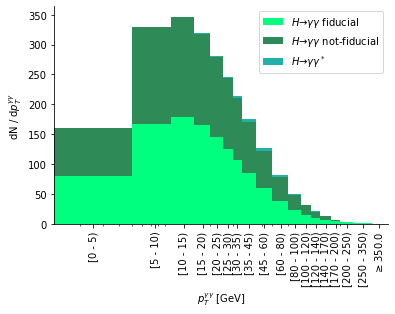

In [23]:
def plot_stack(binning, data, components, labels, show_underflow, show_overflow,
               do_normalization, do_log_x, stacked=True):
    
    # add -inf, +inf to the binning if needed
    binning_with_extraflow = np.copy(np.array(binning))
    if show_underflow:
        binning_with_extraflow = np.append(-np.inf, binning_with_extraflow)
    if show_overflow:
        binning_with_extraflow = np.append(binning_with_extraflow, np.inf)
    
    # create special bins for under/over-flow
    binning_plot = get_binning_for_plot(binning_with_extraflow)
    
    bincenters = 0.5 * (binning_plot[1:] + binning_plot[:-1])
    binwidths = (binning_plot[1:] - binning_plot[:-1])
    
    bin_labels_plot = bin_labels[:]
    
    # add labels for under/over-flow
    bin_labels_plot = extend_bin_labels(bin_labels, binning, add_overflow=show_overflow, add_underflow=show_underflow)

    contents = [data[component] for component in components]
    contents = [remove_under_overflow(c, do_underflow=show_underflow, do_overflow=show_overflow) for c in contents]

    fig, ax = plt.subplots()
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)

    content_previous = np.zeros_like(contents[0])
    
    for component, content, label in zip(components, contents, labels):
        ax.bar(bincenters,
               content / binwidths if do_normalization else content,
               binwidths,
               bottom=content_previous / binwidths if do_normalization else content_previous,
               color=component.get_color(), label=label)
        
        if stacked:
            content_previous += content


    ax.set_xlabel(latex_label)

    if do_normalization:
        ax.set_ylabel('dN / d%s' % str(latex_label.split('[')[0]))
    else:
        ax.set_ylabel('Entries')

    if do_log_x:
        if binning_plot[0] == 0:
            ax.set_xlim(binning_plot[0] + binwidths[0] * 0.25)
        ax.set_xscale('log')

    if bin_labels_plot is not None:
        ax.set_xticks(bincenters)
        ax.set_xticklabels(bin_labels_plot, rotation=90)

    ax.legend()
    
    return fig

fig = plot_stack(binning, all_content,
               [Component('true', 'isFiducial', 'notDalitz'),
                Component('true', 'notFiducial', 'notDalitz'),
                Component('true', 'All', 'isDalitz')],
                (r'$H\to\gamma\gamma$ fiducial',
                r'$H\to\gamma\gamma$ not-fiducial',
                r'$H\to\gamma\gamma^*$'),
               show_underflow=show_underflow, show_overflow=show_overflow,
               do_normalization=do_normalization, do_log_x=do_log_x
              )
fig.savefig('{base_dir}/histo_true_stacked_sys_{sys}.png'.format(base_dir=output_dir_plot1D, sys=sys), bbox_inches='tight')
fig.savefig('{base_dir}/histo_true_stacked_sys_{sys}.pdf'.format(base_dir=output_dir_plot1D, sys=sys), bbox_inches='tight')

## Acceptances

True-fiducial-bin_i (noDalitz) / True-all (noDalitz)

In [27]:
acceptances = all_content[Component('true', 'isFiducial', 'notDalitz')] / all_content[Component('true', 'All', 'notDalitz')].sum()

for ibin, acceptance in enumerate(acceptances):
    print('bin {}: {}'.format(ibin, acceptance))
    
np.save('{base_dir}/acceptances_isFiducial_notDalitz_{quantity}_{mc}_{prod}_{sys}'.format(base_dir=output_dir_acceptances, quantity=quantity, mc=mc, prod=production, sys=sys), acceptances)

bin 0: 0.0
bin 1: 0.02277595606021274
bin 2: 0.04788127555224424
bin 3: 0.05139445555477697
bin 4: 0.04743679368544991
bin 5: 0.041538030032463855
bin 6: 0.035830028514845
bin 7: 0.03067947976168557
bin 8: 0.04897272940602536
bin 9: 0.051350949147071626
bin 10: 0.04305944244819983
bin 11: 0.02647746401570919
bin 12: 0.016686744309218158
bin 13: 0.011348900317160092
bin 14: 0.011057608420325717
bin 15: 0.006710882419178136
bin 16: 0.005995580322700228
bin 17: 0.004140701105513173
bin 18: 0.0016102740349736877


## Inclusive acceptance

In [28]:
acceptances.sum()

0.5049472951077535

## Cross section to be used in ws
Includes under/over-flow

In [29]:
xsections_for_workspace = all_content[Component('true', 'isFiducial', 'notDalitz')] / (luminosity_pb * common.Br)
np.save('{base_dir}/XSections_isFiducial_notDalitz_{quantity}_{mc}_{prod}_{sys}'.format(base_dir=output_dir_xsections, quantity=quantity, mc=mc, prod=production, sys=sys), xsections_for_workspace) 

for ibin, xs in enumerate(xsections_for_workspace):
    print('bin {}: {}'.format(ibin, xs))

bin 0: 0.0
bin 1: 1.257897375274715
bin 2: 2.6444435826423356
bin 3: 2.838473633120589
bin 4: 2.619895213646555
bin 5: 2.294111334504854
bin 6: 1.9788630916607384
bin 7: 1.6944025078461424
bin 8: 2.7047236839155873
bin 9: 2.8360708099014222
bin 10: 2.3781376945577617
bin 11: 1.4623286241526146
bin 12: 0.9215952038612137
bin 13: 0.6267904575978848
bin 14: 0.6107026450161401
bin 15: 0.3706365326023797
bin 16: 0.33113098441334543
bin 17: 0.22868752638318357
bin 18: 0.0889341144104537


## Cross sections to be compared with ATLAS note
xsection * Br / binwidth (in fb or fb/GeV)

In [30]:
bw = binning[1:] - binning[:-1]

if unit == 'MeV':
    bw = bw / 1000.

for ibin, xs in enumerate(xsections_for_workspace[1:-1] * common.Br / bw * 1000, 1):
    print('bin {}: {}'.format(ibin, xs))

bin 1: 571.0854211394743
bin 2: 1200.5774133546167
bin 3: 1288.6670582407005
bin 4: 1189.432453581423
bin 5: 1041.5265691451366
bin 6: 898.4038636948665
bin 7: 769.2587557564217
bin 8: 613.9722899721884
bin 9: 429.1920588249386
bin 10: 269.9186343654576
bin 11: 165.97430255113647
bin 12: 104.60105797626359
bin 13: 71.14071852747888
bin 14: 46.209834505758224
bin 15: 28.044831593764233
bin 16: 15.033346468351562
bin 17: 5.191206771543259


## Reco events stacked

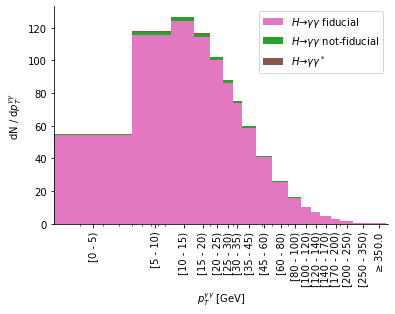

In [31]:
fig = plot_stack(binning, all_content,
               [Component('reco', 'isFiducial', 'notDalitz'),
                Component('reco', 'notFiducial', 'notDalitz'),
                Component('reco', 'All', 'isDalitz')],
               (r'$H\to\gamma\gamma$ fiducial',
                r'$H\to\gamma\gamma$ not-fiducial',
                r'$H\to\gamma\gamma^*$'),
                show_underflow, show_overflow,
                do_normalization=do_normalization, do_log_x=do_log_x
              )

fig.savefig('{base_dir}/histo_reco_stacked_sys_{sys}.png'.format(base_dir=output_dir_plot1D, quantity=quantity, sys=sys), bbox_inches='tight')
fig.savefig('{base_dir}/histo_reco_stacked_sys_{sys}.pdf'.format(base_dir=output_dir_plot1D, quantity=quantity, sys=sys), bbox_inches='tight')

In [32]:
fig = plot_stack(binning, all_content,
               [Component('true', 'isFiducial', 'notDalitz'),
                Component('reco', 'All', 'All')],
               (r'true $H\to\gamma\gamma$ fiducial', r'reco'),
               show_underflow=show_underflow, show_overflow=show_overflow,
               do_normalization=do_normalization, do_log_x=do_log_x, stacked=False
              )


fig.savefig('{base_dir}/histo_reco_true_sys_{sys}.png'.format(base_dir=output_dir_plot1D, quantity=quantity, sys=sys), bbox_inches='tight')
fig.savefig('{base_dir}/histo_reco_true_sys_{sys}.pdf'.format(base_dir=output_dir_plot1D, quantity=quantity, sys=sys), bbox_inches='tight')

## Cfactors

In [33]:
cfactors = all_content[Component('reco', 'All', 'All')] / all_content[Component('true', 'isFiducial', 'notDalitz')]

for ibin, cfactor in enumerate(cfactors):
    print('bin {}: {}'.format(ibin, cfactor))
    
np.save('{base_dir}/cfactors_isFiducial_notDalitz_{quantity}_{mc}_{prod}_{sys}'.format(base_dir=output_dir_cfactors, quantity=quantity, mc=mc, prod=production, sys=sys), cfactors)

bin 0: nan
bin 1: 0.6948967552408356
bin 2: 0.7066786013852947
bin 3: 0.7081605926419862
bin 4: 0.7064626868798304
bin 5: 0.7065668139121449
bin 6: 0.7057607133869885
bin 7: 0.7038579077338861
bin 8: 0.7009889799724599
bin 9: 0.698593692270546
bin 10: 0.6987236865292554
bin 11: 0.7032168272941557
bin 12: 0.7198094898019554
bin 13: 0.7341721710244936
bin 14: 0.7478938355604904
bin 15: 0.7581820193546999
bin 16: 0.7722885320022165
bin 17: 0.7856605175066189
bin 18: 0.7975234617137268


/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


## Yield Reco/True

In [34]:
def plot2D(content2d, latex_label, bin_labelx, bin_labely, v_min, v_max, f_mt, ax=None):
            
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))

    hm = sns.heatmap(content2d,
                     xticklabels=bin_labelx,
                     yticklabels=bin_labely,
                     annot=True,
                     ax=ax,
                     square=True,
                     vmin=v_min,
                     vmax=v_max,
                     cmap='YlGnBu',
                     fmt=f_mt,
                     cbar_kws={'shrink':0.82})
    
    ax.set_ylabel('true_%s' % latex_label)
    ax.set_xlabel('reco_%s' % latex_label)
    hm.set_yticklabels(hm.get_yticklabels(), va="center")
    hm.set_xticklabels(hm.get_xticklabels(), rotation=90)
    
    return fig, ax

In [35]:
histo2d__isFiducial_isPassed_notDalitz = f.Get("histo2d_%s__isFiducial_isPassed_notDalitz_norm" % quantity)
content2d__isFiducial_isPassed_notDalitz, binningx, binningy = TH2F2np(histo2d__isFiducial_isPassed_notDalitz)

### Check 2d sum is equivalent to 1D

In [36]:
print(content2d__isFiducial_isPassed_notDalitz.sum(),
      all_content[Component(recotrue='reco', fiducial='isFiducial', dalitz='notDalitz')].sum())

6105.362186333938 6105.362186333938


In [37]:
print(all_content[Component(recotrue='reco', fiducial='isFiducial', dalitz='notDalitz')][1],
      content2d__isFiducial_isPassed_notDalitz.sum(axis=0)[1])

270.71824863102523 270.7182486310254


## 2D isFiducial, notDalitz, isPassed

In [38]:
if do_plots:
    fig, ax = plot2D(content2d__isFiducial_isPassed_notDalitz,
               latex_label, bin_labels_extraflow, bin_labels_extraflow, 0., None, '.1f')


    ax.set_title('Yield Reco/True isFiducial_isPassed_{mc}_{prod}_sys{sys}_LUMI_{lumi}'.format(mc=mc, prod=production, sys=sys, lumi=luminosity_pb))
    plt.show()

In [39]:
# compute the non-passed as a difference true - reco

notPassed_isFiducial_notDalitz = all_content[Component(recotrue='true', fiducial='isFiducial', dalitz='notDalitz')] - \
                                 all_content[Component(recotrue='reco', fiducial='isFiducial', dalitz='notDalitz')]
notPassed_isDalitz = all_content[Component(recotrue='true', fiducial='All', dalitz='isDalitz')].sum() - \
                     all_content[Component(recotrue='reco', fiducial='All', dalitz='isDalitz')].sum()
notPassed_notFiducial_notDalitz = all_content[Component(recotrue='true', fiducial='notFiducial', dalitz='notDalitz')].sum() - \
                                  all_content[Component(recotrue='reco', fiducial='notFiducial', dalitz='notDalitz')].sum() 

In [40]:
# column of non-passed
notPassed = np.concatenate([[notPassed_notFiducial_notDalitz], [notPassed_isDalitz], notPassed_isFiducial_notDalitz])

In [41]:
# add two rows (isDalitz, notFiducial notDalitz) on top of the 2D fiducial noDalitz matrix
content2d_extended = np.vstack([
    all_content[Component(recotrue='reco', fiducial='notFiducial', dalitz='notDalitz')],
    all_content[Component(recotrue='reco', fiducial='All', dalitz='isDalitz')],
    content2d__isFiducial_isPassed_notDalitz,
    ])

# add the non-passed column
content2d_extended = np.hstack([np.expand_dims(notPassed, axis=1), content2d_extended])

In [42]:
bin_labels_x = ['notPassed'] + bin_labels_extraflow
bin_labels_y = ['notFiducial & notDatlitz', 'isDalitz'] + bin_labels_extraflow


if do_plots:
    fig, ax = plot2D(content2d_extended,
               latex_label, bin_labels_x, bin_labels_y, 0., None, '.0f')
    ax.set_title('Yield All_{mc}_{prod}_sys{sys}_LUMI_{lumi} $[\%]$'.format(lumi=luminosity_pb, sys=sys, prod=production, mc=mc))
    plt.show()

    fig.savefig('{basedir}/yield2d_isFiducial_isPassed_{mc}_{prod}_sys{sys}_LUMI_{lumi}.png'.format(basedir=output_dir_folding_matrices_plot, quantity=quantity, mc=mc, prod=production, sys=sys, lumi=luminosity_pb), bbox_inches='tight')
    fig.savefig('{basedir}/yield2d_isFiducial_isPassed_{mc}_{prod}_sys{sys}_LUMI_{lumi}.pdf'.format(basedir=output_dir_folding_matrices_plot, quantity=quantity, mc=mc, prod=production, sys=sys, lumi=luminosity_pb), bbox_inches='tight')

### Folding matrix All

/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


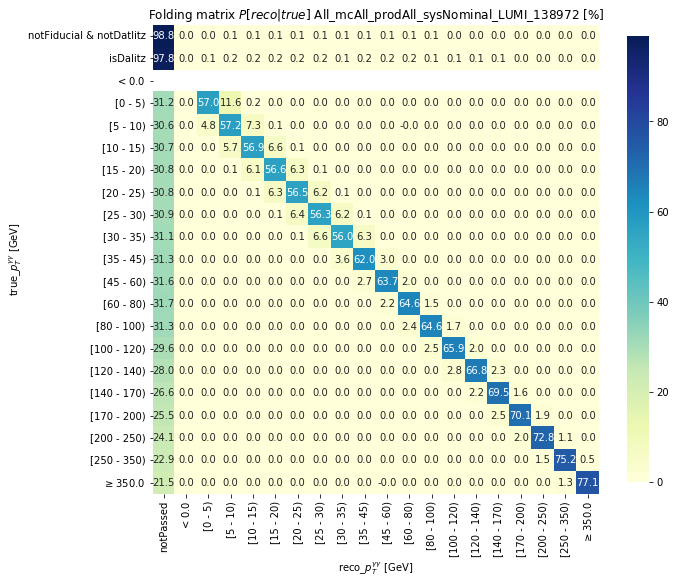

In [43]:
folding_matrix = (content2d_extended.T / content2d_extended.sum(axis=1)).T

if do_plots:
    fig, ax = plot2D(folding_matrix * 100,
               latex_label, bin_labels_x, bin_labels_y, 0., None, '.1f')
    ax.set_title('Folding matrix $P[reco|true]$ All_{mc}_{prod}_sys{sys}_LUMI_{lumi} $[\%]$'.format(lumi=luminosity_pb, sys=sys, prod=production, mc=mc))
    plt.show()

### Folding matrix All no extraflow

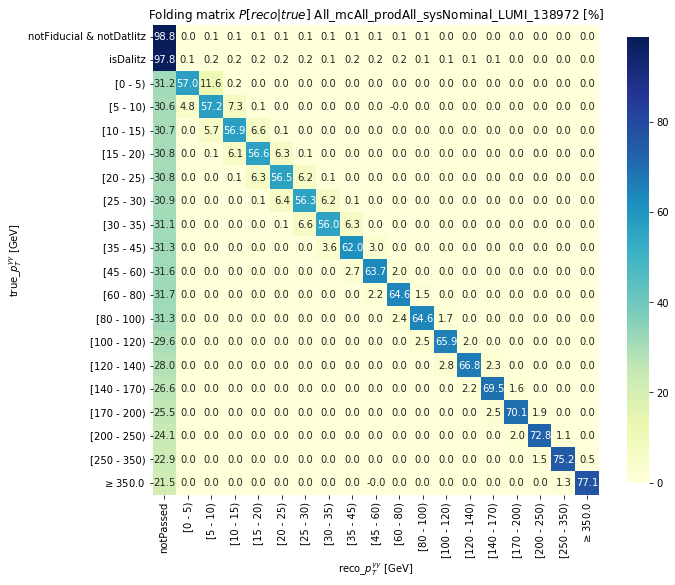

In [44]:
bin_labels_x = ['notPassed'] + list(remove_under_overflow(bin_labels_extraflow, do_overflow=show_overflow, do_underflow=show_underflow))
bin_labels_y = ['notFiducial & notDatlitz', 'isDalitz'] + list(remove_under_overflow(bin_labels_extraflow, do_overflow=show_overflow, do_underflow=show_underflow))


folding_matrix_noextraflow = folding_matrix[:]
if show_underflow is not True:
    folding_matrix_noextraflow = np.delete(folding_matrix_noextraflow, [2], 0)
    folding_matrix_noextraflow = np.delete(folding_matrix_noextraflow, [1], 1)
if show_overflow is not True:
    last_bin = folding_matrix_noextraflow.shape[0]
    folding_matrix_noextraflow = np.delete(folding_matrix_noextraflow, [last_bin - 1], 0)
    last_bin = folding_matrix_noextraflow.shape[1]
    folding_matrix_noextraflow = np.delete(folding_matrix_noextraflow, [last_bin - 1], 1)


fig, ax = plot2D(folding_matrix_noextraflow * 100,
           latex_label, bin_labels_x, bin_labels_y, 0., None, '.1f')
ax.set_title('Folding matrix $P[reco|true]$ All_{mc}_{prod}_sys{sys}_LUMI_{lumi} $[\%]$'.format(lumi=luminosity_pb, sys=sys, prod=production, mc=mc))
plt.show()

fig.savefig('{basedir}/folding_{mc}_{prod}_sys{sys}_LUMI_{lumi}.png'.format(basedir=output_dir_folding_matrices_plot, quantity=quantity, mc=mc, prod=production, sys=sys, lumi=luminosity_pb), bbox_inches='tight')
fig.savefig('{basedir}/folding_{mc}_{prod}_sys{sys}_LUMI_{lumi}.pdf'.format(basedir=output_dir_folding_matrices_plot, quantity=quantity, mc=mc, prod=production, sys=sys, lumi=luminosity_pb), bbox_inches='tight')

## Folding matrix is passed

In [45]:
folding_matrix_ispassed = folding_matrix[:, 1:]
    
# this will be used in the workspace
np.save('{base_dir}/folding_matrix_isPassed_for_workspace_{quantity}_{mc}_{prod}_{sys}'.format(base_dir=output_dir_folding_matrices, quantity=quantity, mc=mc, prod=production, sys=sys),
        folding_matrix_ispassed)

if do_plots:
    bin_labels_x = bin_labels_extraflow
    bin_labels_y = ['notFiducial & notDatlitz', 'isDalitz'] + list(bin_labels_extraflow)

    fig, ax = plot2D(folding_matrix_ispassed * 100,
                     latex_label, bin_labels_x, bin_labels_y, 0., None, '.1f')
    ax.set_title('Folding matrix $P[reco|true]$ All_{mc}_{prod}_sys{sys}_LUMI_{lumi} $[\%]$'.format(lumi=luminosity_pb, sys=sys, prod=production, mc=mc))
    plt.show()

## Folding matrix isPassed without extraflow

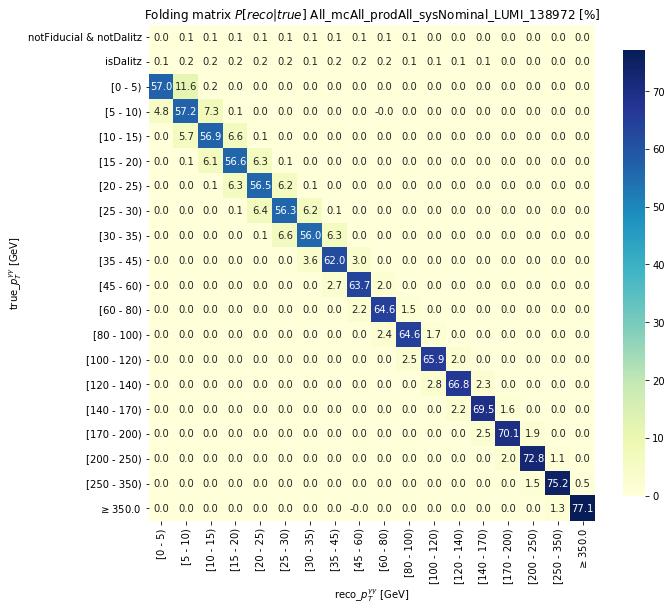

In [46]:
if do_plots:
    folding_matrix_ispassed_noextraflow = folding_matrix_noextraflow[:, 1:]

    bin_labels_x = remove_under_overflow(bin_labels_extraflow, do_overflow=show_overflow, do_underflow=show_underflow)
    bin_labels_y = ['notFiducial & notDalitz', 'isDalitz'] + list(remove_under_overflow(bin_labels_extraflow, do_overflow=show_overflow, do_underflow=show_underflow))

    fig, ax = plot2D(folding_matrix_ispassed_noextraflow * 100,
               latex_label, bin_labels_x, bin_labels_y, 0., None, '.1f')
    ax.set_title('Folding matrix $P[reco|true]$ All_{mc}_{prod}_sys{sys}_LUMI_{lumi} $[\%]$'.format(lumi=luminosity_pb, sys=sys, prod=production, mc=mc))
    plt.show()

    fig.savefig('{basedir}/folding_isPassed_{mc}_{prod}_sys{sys}_LUMI_{lumi}.png'.format(basedir=output_dir_folding_matrices_plot, quantity=quantity, mc=mc, prod=production, sys=sys, lumi=luminosity_pb), bbox_inches='tight')
    fig.savefig('{basedir}/folding_isPassed_{mc}_{prod}_sys{sys}_LUMI_{lumi}.pdf'.format(basedir=output_dir_folding_matrices_plot, quantity=quantity, mc=mc, prod=production, sys=sys, lumi=luminosity_pb), bbox_inches='tight')